### setup's and imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### data laoding and preprocessing 
the stroke prediction data set


In [2]:
raw = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
from sklearn.model_selection import train_test_split
data = raw.drop(["id"], axis=1)
data["gender"] = data["gender"].astype("category").cat.codes
data["ever_married"] = data["ever_married"].astype("category").cat.codes
data["work_type"] = data["work_type"].astype("category").cat.codes
data["Residence_type"] = data["Residence_type"].astype("category").cat.codes
data["smoking_status"] = data["smoking_status"].astype("category").cat.codes
data = data.dropna(axis=0)
y = data.drop(["stroke"], axis=1)
x = data["stroke"]
train_labels = x.iloc[:3920]
test_labels = x.iloc[3920:]
train_x = y.iloc[:3920][:]
test_x = y.iloc[3920:][:]

### Define a model

Start by building a simple sequential model:

In [7]:
# Define a simple sequential model
def create_model():
   model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,10)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='softmax'),  # hidden layer (2)
    keras.layers.Dense(1, activation='sigmoid') # output layer (3)
  ])
   return model

# Create a basic model instance
model = create_model()
# compile the model 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


### trainning the model

In [8]:
# Train the model 
history = model.fit(train_x, 
          train_labels,  
          epochs=5,
          validation_data=(test_x, test_labels),)  

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/5
123/123 [==============================] - 1s 4ms/step - loss: 0.5714 - accuracy: 0.9441 - val_loss: 0.4949 - val_accuracy: 1.0000
Epoch 2/5
123/123 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.9467 - val_loss: 0.4125 - val_accuracy: 1.0000
Epoch 3/5
123/123 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.9467 - val_loss: 0.3479 - val_accuracy: 1.0000
Epoch 4/5
123/123 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.9467 - val_loss: 0.2968 - val_accuracy: 1.0000
Epoch 5/5
123/123 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.9467 - val_loss: 0.2557 - val_accuracy: 1.0000


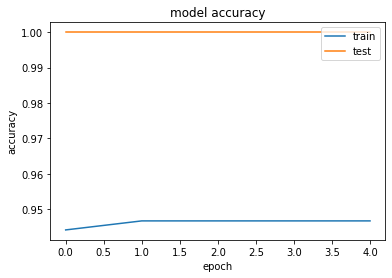

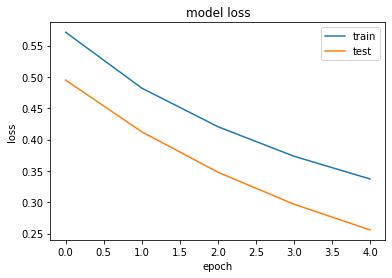

In [10]:
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("model-accuracy.jpg")
plt.show()
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("model-loss.jpg")
plt.show()

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(test_x, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

31/31 - 0s - loss: 0.1414 - accuracy: 1.0000
Untrained model, accuracy: 100.00%


In [ ]:
#test the model on new data
print(model.predict(test_x))

[[0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13186973]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13186973]
 [0.1318697 ]
 [0.1318698 ]
 [0.13186973]
 [0.1318697 ]
 [0.13186973]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13186973]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13187046]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13186973]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318698 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13186976]
 [0.1318697 ]
 [0.1318698 ]
 [0.13186973]
 [0.13186973]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.1318697 ]
 [0.13186973]
 [0.1318697 ]
 [0.13